# i. Introductions

- Nama : Sihar pangaribuan
- Batch : HCK-005
- Objektiv : Membuat model Artificial Neural Network untuk memprediksi customer apakah akan churn atau tidak

### Dataset Description

Dataset name : `churn.csv`

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |




# ii. Import Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

import pickle
import warnings
warnings.filterwarnings(action='ignore')


# iii. Data Loading

In [68]:
# Import dataset
df = pd.read_csv('churn.csv')

In [69]:
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [70]:
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [72]:
# Check duplicated value
df[df.duplicated]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,...,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,...,497.320000,15082.13,11.0,730.340000,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
16165,9c8c2db425854d5e,54,M,NaN,Platinum Membership,2015-09-28,Yes,Without Offers,Smartphone,Fiber_Optic,...,1267.660000,38244.30,18.0,741.640000,No,Yes,No,Not Applicable,No reason specified,0
22341,9186d6f284e4ac5b,59,M,Town,Basic Membership,2015-01-07,NaN,Credit/Debit Card Offers,Desktop,Mobile_Data,...,266.190000,48632.63,19.0,654.590000,Yes,Yes,Yes,Unsolved,Poor Website,1
24693,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
26214,a594feaffc78b36b,58,M,City,Basic Membership,2017-04-01,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,...,0.000000,7614.88,29.0,202.317926,Yes,No,No,Not Applicable,Poor Customer Service,1
26687,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,...,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0


Terdapat data duplicated sebanyak 18 baris dan akan dihapus

In [73]:
# Remove duplicated value
df = df.drop_duplicates()

# iv. Exploratory Data Analysis (EDA)

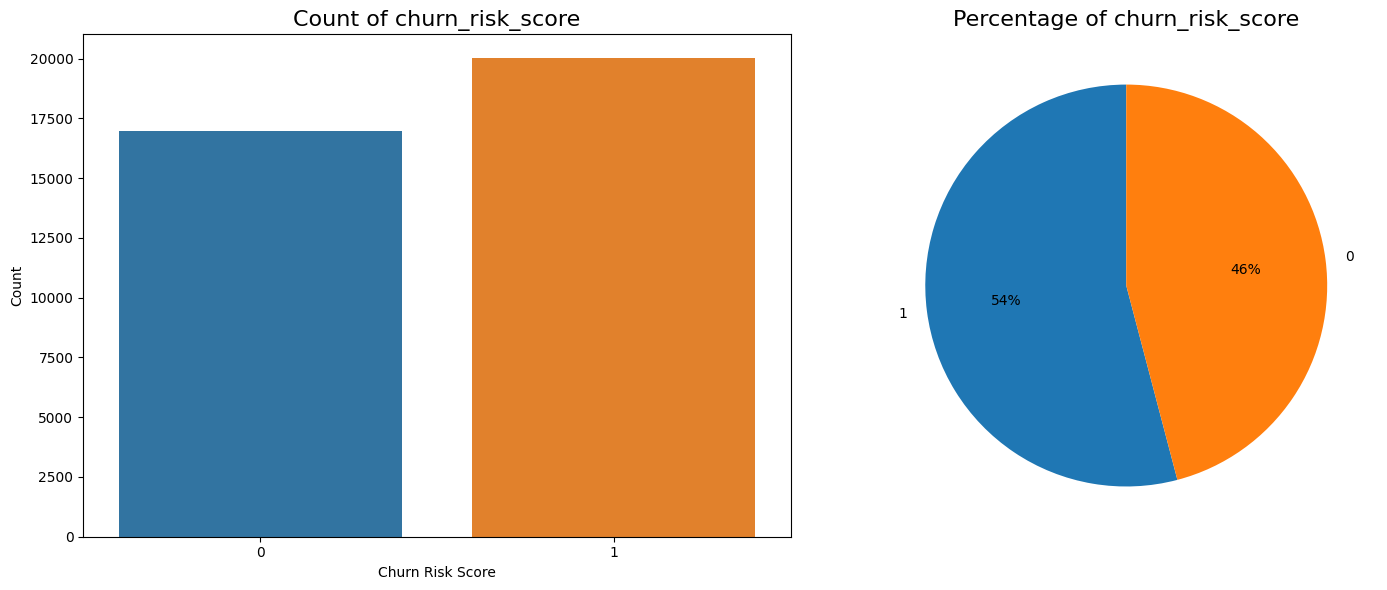

In [74]:
# Visualization in column churn_risk_score as a target
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='churn_risk_score', data=df)
plt.title('Count of churn_risk_score', fontsize=16)
plt.xlabel('Churn Risk Score')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
churn_counts = df['churn_risk_score'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.0f%%', startangle=90)
plt.title('Percentage of churn_risk_score', fontsize=16)

plt.tight_layout()
plt.show()

Terdapat data yang balance pada kolom target dengan persentasi yang churn sebanyak 54% dan tidak churn 46%


In [75]:
# split data numeric and data categoric
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [76]:
df_num.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,279.147450,29271.194003,14.658617,623.562421,0.540982
std,15.867412,228.819900,329.947709,19444.806226,9.479184,270.263994,0.498324
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,7.000000,574.135000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,14.000000,680.370000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


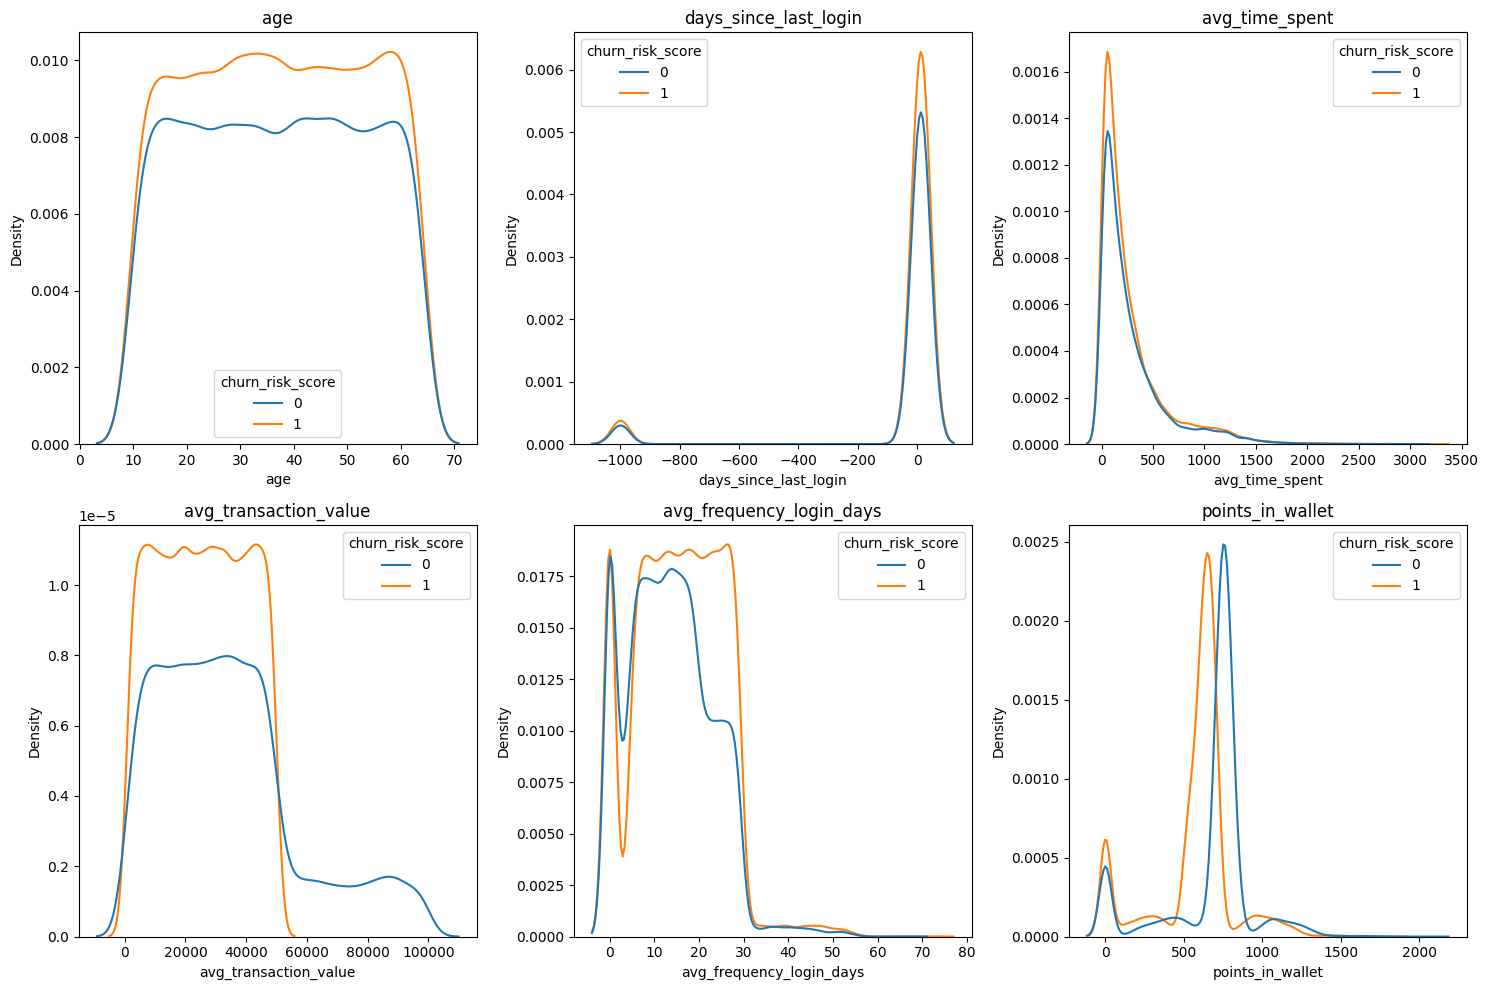

In [77]:
# Visualization on numeric columns
num_plot = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(num_plot):
    ax = axes.flatten()[i]
    sns.kdeplot(data=df, x=var, hue='churn_risk_score', ax=ax)
    ax.set_title(var)

plt.tight_layout()
plt.show()

In [78]:
# Check skew in numeric columns
for col in df_num:
    print(col)    
    print('\nSkewness Value:', round(df_num[col].skew(),2))
    print(20 *('*'))

age

Skewness Value: -0.01
********************
days_since_last_login

Skewness Value: -3.94
********************
avg_time_spent

Skewness Value: 2.28
********************
avg_transaction_value

Skewness Value: 1.01
********************
avg_frequency_login_days

Skewness Value: 0.39
********************
points_in_wallet

Skewness Value: -0.77
********************
churn_risk_score

Skewness Value: -0.16
********************


In [79]:
df_num.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003970,0.000548,-0.000473,-0.001769,-0.000995,0.006124
days_since_last_login,-0.003970,1.000000,0.000040,0.003934,-0.000941,0.000046,-0.006228
avg_time_spent,0.000548,0.000040,1.000000,0.022731,-0.001520,-0.001395,-0.013244
avg_transaction_value,-0.000473,0.003934,0.022731,1.000000,-0.116673,0.056403,-0.218012
avg_frequency_login_days,-0.001769,-0.000941,-0.001520,-0.116673,1.000000,-0.025831,0.113525
points_in_wallet,-0.000995,0.000046,-0.001395,0.056403,-0.025831,1.000000,-0.200166
churn_risk_score,0.006124,-0.006228,-0.013244,-0.218012,0.113525,-0.200166,1.000000


Berdasarkan EDA yang dilakukan terhadap kolom numerik ditemukan beberapa insight :
- Column age
    - rentan umurnya pelanggan adalah antara 10 tahun sampai 70 tahun
    - memiliki normal skew
    - tidak memiliki pengaruh terhadap target
- Column days_since_last_login
    - kabanyakan pelanggan days last loginnya adalah 0
    - memiliki distribusi yang right skew 
    - tidak memiliki pengaruh terhadap target
- Column avg_time_spent
    - kebanyakan pelanggan time spentnya adalah sekitar < 1000
    - memiliki distribusi yang left skew 
    - tidak memiliki pengaruh terhadap target
- Column avg_transaction_value
    - pelanggan yang churn dominan yang memiliki avg transaction value 60000 kebawah
    - memiliki distribusi yang left skew
- Column avg_frequency_login_days
    - Konsumen yang berkunjung ke website kebanyakan adalah sebanyak 30 kali 
    - memiliki distribusi yang left skew
- Column points_in_wallet
    - pelanggan yang cenderung churn adalah pelanggan yang nilai pointnya lebih kecil
    - memiliki distribusi yang normal


In [80]:
df_cat.describe()

,user_id,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36933,31564,36992,36992,31554,36704,31599,36992,36992,36992,36992,36992,36992,36992
unique,36992,2,3,6,1096,2,3,3,3,30101,2,2,2,5,9
top,9f420209e7d129f3,F,Town,Basic Membership,2015-06-02,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,18490,14128,7724,55,15839,12349,13913,12413,6,20342,20440,18602,18602,6350


In [81]:
for i in df_cat:
    print(i)
    print(df_cat[i].value_counts())
    print(40*('#'))

user_id
user_id
9f420209e7d129f3    1
956a20cd3078563d    1
9c2a36af737a4379    1
848bc9e61cd58388    1
91d071374526be60    1
                   ..
8839b3743a8cd001    1
b4a94c111c172eb9    1
94ce3295215d2c98    1
925e675f7c7c1670    1
93b5d0330d24fa15    1
Name: count, Length: 36992, dtype: int64
########################################
gender
gender
F    18490
M    18443
Name: count, dtype: int64
########################################
region_category
region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64
########################################
membership_category
membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64
########################################
joining_date
joining_date
2015-06-02    55
2015-07-04    51
2015-06-21    50
2016-08-03    49
2015-06-26    49
              ..
2015

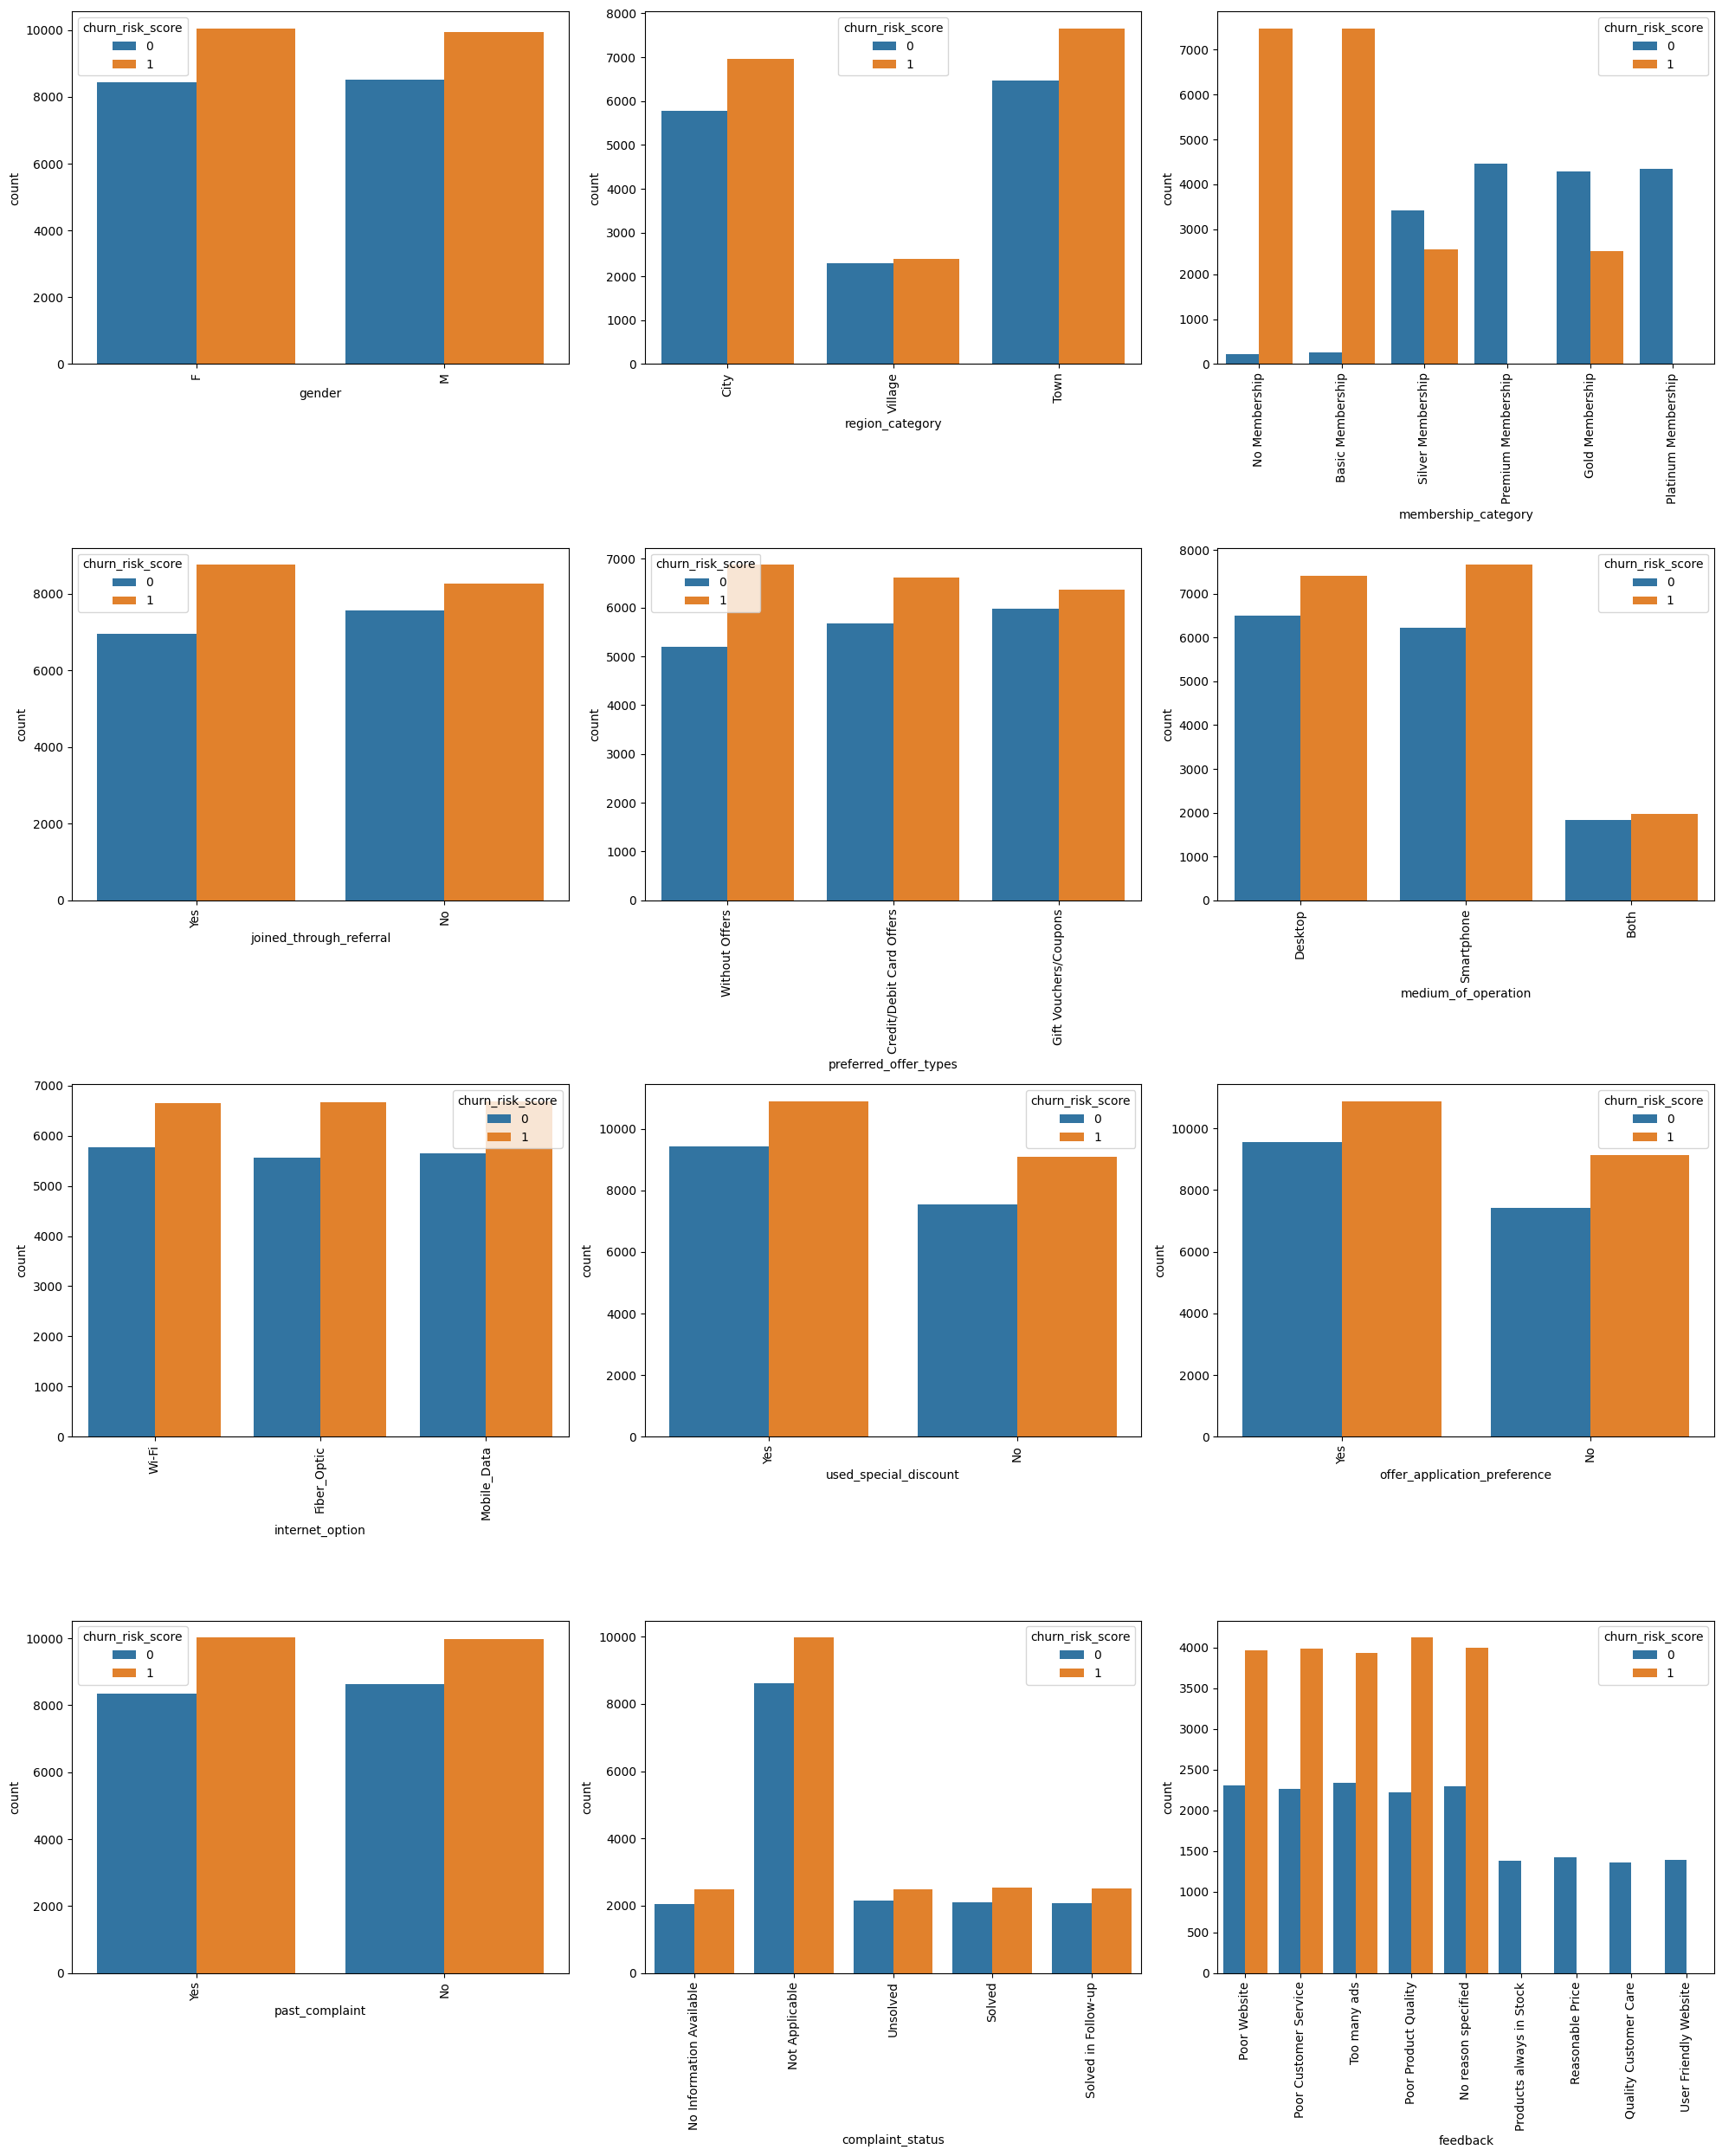

In [82]:
# Visualization on categoric columns
cat_plot = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference','past_complaint', 'complaint_status', 'feedback']

fig, axes = plt.subplots(4, 3, figsize=(20, 25))
for cat, ax in zip(cat_plot, axes.flatten()):
    sns.countplot(x=cat, data=df, hue='churn_risk_score', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


Berdasarkan EDA yang dilakukan pada kolom kategori ditemukan beberapa insight
- Gender tidak memiliki pengaruh terhadap churn
- Pelanggan yang cenderung lebih banyak churn pada region town
- pelanggan yang lebih banyak churn adalah yang no membership dan basic membership, namun ada juga yang silver membership dan juga gold membership
- pelanggan yang tidak churn adalah dominan pelanggan yang join tidak berdasarkan referal
- internet option tidak memiliki terhadap churn 
- pelanggan yang lebih banyak churn adalah pelanggan yang menggunakan special discount
- prefered ofter types tidak memiliki pengaruh terhadap churn
- past complaint tidak memiliki perngaruh terhadap churn
- pelanggan yang cenderung churn adalah pelanggan yang complaint statusnya not applicable
- pelanggan yang churn adalah pelanggan yang fedbacknya negatif antara lain poorwebsite, poorcustomer service to many ads, poor product quality, no reason specified

In [83]:
# Saving data inference from dataset
inference = df.sample(50, random_state = 22)
inference.to_csv('imference.csv', index=False)

# Deleting data inference from dataset
df = df.drop(inference.index)

# v. Feature Engineering

## Split data

In [84]:
# Split fitur and target 
X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

In [85]:
# split train-set, val-set, test-set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=22)

print('Train Size :', X_train.shape)
print('Val Size :', X_val.shape)
print('Test Size :', X_test.shape)

Train Size : (23642, 21)
Val Size : (5911, 21)
Test Size : (7389, 21)


## Fitur Selection

In [86]:
# Drop Columns not use
X_train.drop(['user_id', 'age', 'gender','joining_date', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time','days_since_last_login','past_complaint'], axis=1, inplace=True)
X_val.drop(['user_id', 'age', 'gender','joining_date', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time','days_since_last_login','past_complaint'], axis=1, inplace=True)
X_test.drop(['user_id', 'age', 'gender','joining_date', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time','days_since_last_login','past_complaint'], axis=1, inplace=True)

## Split Numeric columns and categoric columns

In [87]:
num_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()
num_col

['avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

## Handling missing value

In [88]:
# Check missing value in X_train
X_train_missing=X_train.isnull().sum().sort_values(ascending=False)
X_train_missing.loc[X_train_missing> 0]

joined_through_referral    3476
region_category            3436
dtype: int64

In [89]:
# Check missing value in X_val
X_val_missing=X_val.isnull().sum().sort_values(ascending=False)
X_val_missing.loc[X_val_missing> 0]

region_category            931
joined_through_referral    867
dtype: int64

In [90]:
# Check missing value in X_test
X_test_missing=X_test.isnull().sum().sort_values(ascending=False)
X_test_missing.loc[X_test_missing> 0]

joined_through_referral    1084
region_category            1054
dtype: int64

## Handling outlier

In [91]:
for col in X_train[num_col]:    
    print(col, 'Skewness Value:', round(X_train[num_col][col].skew(),2))
    print(50 *('*'))

avg_time_spent Skewness Value: 2.28
**************************************************
avg_transaction_value Skewness Value: 0.99
**************************************************
avg_frequency_login_days Skewness Value: 0.42
**************************************************
points_in_wallet Skewness Value: -0.77
**************************************************


Outlier akan di hanle dengan winsorizer pada pipeline

## Pipeline Preproses


In [92]:
# Pipeline for numeric columns
num_pipe = Pipeline([
    ('outler', Winsorizer(capping_method='iqr', tail='both', fold=3)),
    ('scaling', MinMaxScaler())
])

# Pipeline for categoric columns oridnal encode
cat_pipe1 = Pipeline([
    ('imputer_1', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encode', OrdinalEncoder(categories=[['No Membership', 'Basic Membership', 'Silver Membership','Premium Membership', 'Gold Membership', 'Platinum Membership'], 
                                                ['No', 'Yes'],
                                                ['No', 'Yes'],
                                                ['No', 'Yes']])) 
])

# Pipeline for categoric columns OneHotEncoder
cat_pipe2 = Pipeline([
    ('imputer_1', SimpleImputer(strategy='most_frequent')),
    ('ohe_enc', OneHotEncoder(sparse=False))
])

In [93]:
# Concat all pipeline
preproses = ColumnTransformer([
    ('num_pipe', num_pipe, num_col),
    ('cat_pipe1', cat_pipe1, ['membership_category', 'joined_through_referral', 'used_special_discount', 'offer_application_preference']),
    ('cat_pipe2', cat_pipe2, ['region_category','complaint_status', 'feedback'])
])

In [94]:
# Fit and transform
X_train = preproses.fit_transform(X_train)
X_val = preproses.transform(X_val)
X_test = preproses.transform(X_test)

In [95]:
df['feedback'].unique()

array(['Poor Website', 'Poor Customer Service', 'Too many ads',
       'Poor Product Quality', 'No reason specified',
       'Products always in Stock', 'Reasonable Price',
       'Quality Customer Care', 'User Friendly Website'], dtype=object)

# vi. Model Definition

In [96]:
alp = 10
inp = X_train.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))

## Squential API


In [97]:
# Create Sequential API
model_sequential = Sequential()
model_sequential.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,))) # Input Layer
model_sequential.add(tf.keras.layers.Dense(hid, activation='relu')) # Hidden Layer 1 
model_sequential.add(tf.keras.layers.Dense(out, activation='sigmoid')) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_sequential.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 25)                650       
                                                                 
 dense_11 (Dense)            (None, 90)                2340      
                                                                 
 dense_12 (Dense)            (None, 1)                 91        
                                                                 
Total params: 3,081
Trainable params: 3,081
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Functional API

In [99]:
# Create Functional Model

input_layer = Input(shape=(inp,))
hidden_layer_1 = tf.keras.layers.Dense(inp, activation='relu', name = 'hidden_layer_1')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(hid, activation='relu', name = 'hidden_layer_2')(hidden_layer_1)

concat = tf.keras.layers.concatenate([input_layer, hidden_layer_2])
output_layer = tf.keras.layers.Dense(1,activation = "sigmoid",  name = "output_layer" )(concat)

model_functional =  tf.keras.Model(inputs = input_layer, outputs = output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model_functional.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 hidden_layer_1 (Dense)         (None, 25)           650         ['input_3[0][0]']                
                                                                                                  
 hidden_layer_2 (Dense)         (None, 90)           2340        ['hidden_layer_1[0][0]']         
                                                                                                  
 concatenate_1 (Concatenate)    (None, 115)          0           ['input_3[0][0]',                
                                                                  'hidden_layer_2[0][0]']   

In [100]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# vii. Model Training

## Squential API

In [101]:
# Train the Model

history_seq = model_sequential.fit(X_train,
                                   y_train,
                                   epochs=40,
                                   validation_data=(X_val, y_val),
                                   batch_size=16)

Epoch 1/40
1478/1478 [==============================] - 4s 2ms/step - loss: 0.3586 - accuracy: 0.8448 - val_loss: 0.3278 - val_accuracy: 0.8537
Epoch 2/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.3212 - accuracy: 0.8513 - val_loss: 0.3157 - val_accuracy: 0.8533
Epoch 3/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.3112 - accuracy: 0.8546 - val_loss: 0.3104 - val_accuracy: 0.8567
Epoch 4/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.2972 - accuracy: 0.8559 - val_loss: 0.2877 - val_accuracy: 0.8598
Epoch 5/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.2785 - accuracy: 0.8611 - val_loss: 0.2746 - val_accuracy: 0.8640
Epoch 6/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.2656 - accuracy: 0.8680 - val_loss: 0.2607 - val_accuracy: 0.8763
Epoch 7/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.2581 - accuracy: 0.8704 - val_loss: 0.2597 - val_accuracy:

## Functional API

In [102]:
# Train the Model
history_func = model_functional.fit(X_train,
                                    y_train,
                                    epochs=40,
                                    validation_data=(X_val, y_val),
                                    batch_size=10)

Epoch 1/40
2365/2365 [==============================] - 5s 2ms/step - loss: 0.3441 - accuracy: 0.8452 - val_loss: 0.3196 - val_accuracy: 0.8559
Epoch 2/40
2365/2365 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.8510 - val_loss: 0.3076 - val_accuracy: 0.8584
Epoch 3/40
2365/2365 [==============================] - 4s 2ms/step - loss: 0.3054 - accuracy: 0.8540 - val_loss: 0.2902 - val_accuracy: 0.8570
Epoch 4/40
2365/2365 [==============================] - 3s 1ms/step - loss: 0.2789 - accuracy: 0.8567 - val_loss: 0.2633 - val_accuracy: 0.8687
Epoch 5/40
2365/2365 [==============================] - 5s 2ms/step - loss: 0.2631 - accuracy: 0.8607 - val_loss: 0.2570 - val_accuracy: 0.8598
Epoch 6/40
2365/2365 [==============================] - 5s 2ms/step - loss: 0.2598 - accuracy: 0.8621 - val_loss: 0.2547 - val_accuracy: 0.8674
Epoch 7/40
2365/2365 [==============================] - 5s 2ms/step - loss: 0.2560 - accuracy: 0.8680 - val_loss: 0.2534 - val_accuracy:

# viii. Model Evaluation

## Squential API

In [103]:
# Create DataFrame
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.358591,0.844768,0.327836,0.853663
1,0.321210,0.851282,0.315724,0.853324
2,0.311186,0.854623,0.310430,0.856708
3,0.297212,0.855934,0.287720,0.859753
4,0.278483,0.861095,0.274620,0.863982
5,0.265584,0.868031,0.260656,0.876332
6,0.258143,0.870400,0.259696,0.879716
7,0.254456,0.875983,0.252110,0.889866
8,0.251787,0.879240,0.248073,0.895957
9,0.250296,0.881651,0.251158,0.877855


<Axes: >

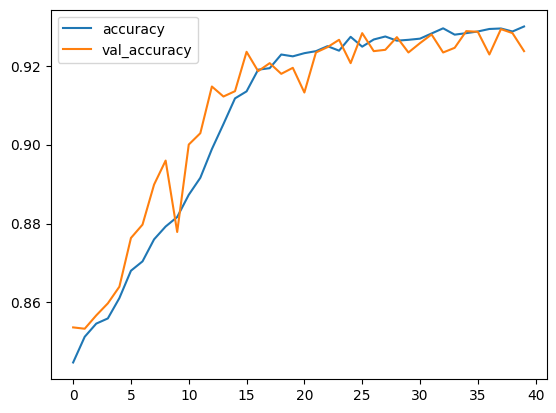

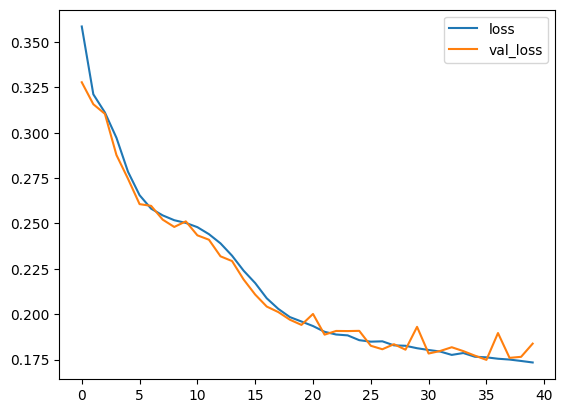

In [104]:
# Plot Training Results
history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [105]:
# Evaluate Test-Set Sequential API
y_pred_seq = model_functional.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

231/231 [==============================] - 0s 931us/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3438
           1       0.94      0.92      0.93      3951

    accuracy                           0.93      7389
   macro avg       0.92      0.93      0.92      7389
weighted avg       0.93      0.93      0.93      7389



In [106]:
# Saving report
all_reports = {}
score_reports = {
    'Test - precision' : precision_score(y_test, y_pred_seq),
    'Test - recall' : recall_score(y_test, y_pred_seq),
    'Test - accuracy' : accuracy_score(y_test, y_pred_seq),
    'Test - f1_score' : f1_score(y_test, y_pred_seq),
}
all_reports['Sequential API'] = score_reports
pd.DataFrame(all_reports)

,Sequential API
Test - accuracy,0.925159
Test - f1_score,0.929437
Test - precision,0.937210
Test - recall,0.921792


## Functional API

In [107]:
# Create DataFrame
history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.344092,0.845233,0.319607,0.855862
1,0.317587,0.850986,0.307644,0.858400
2,0.305383,0.854031,0.290152,0.857046
3,0.278865,0.856653,0.263266,0.868719
4,0.263128,0.860714,0.256967,0.859753
5,0.259812,0.862068,0.254664,0.867366
6,0.255980,0.867989,0.253404,0.863137
7,0.253987,0.871162,0.250089,0.875317
8,0.251710,0.874714,0.263506,0.854509
9,0.250688,0.875307,0.267066,0.878532


<Axes: >

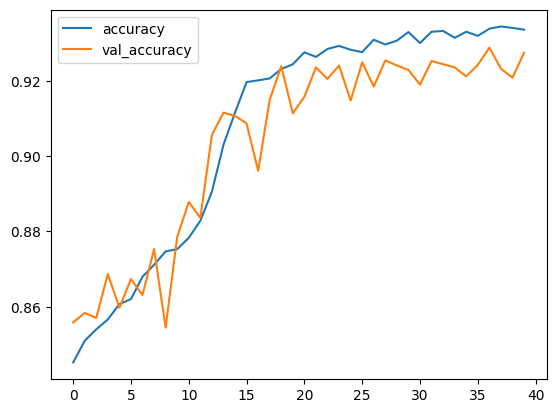

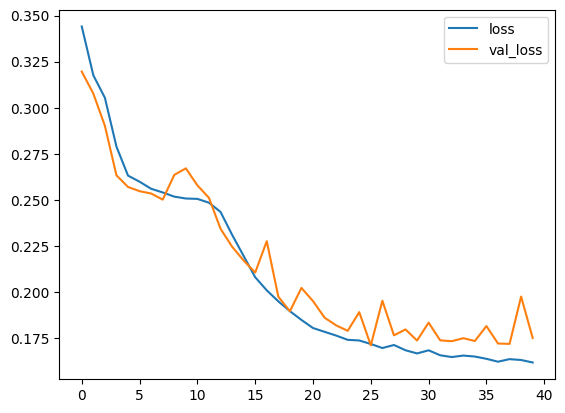

In [108]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [109]:
# Evaluate Test-Set Functionl API
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

231/231 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3438
           1       0.94      0.92      0.93      3951

    accuracy                           0.93      7389
   macro avg       0.92      0.93      0.92      7389
weighted avg       0.93      0.93      0.93      7389



In [110]:
# Saving report
score_reports = {
    'Test - precision' : precision_score(y_test, y_pred_func),
    'Test - recall' : recall_score(y_test, y_pred_func),
    'Test - accuracy' : accuracy_score(y_test, y_pred_func),
    'Test - f1_score' : f1_score(y_test, y_pred_func),
}
all_reports['Functional API'] = score_reports
pd.DataFrame(all_reports)

,Sequential API,Functional API
Test - precision,0.937210,0.937210
Test - recall,0.921792,0.921792
Test - accuracy,0.925159,0.925159
Test - f1_score,0.929437,0.929437


# Hyperparameter Tuning

## Sequential API

In [111]:
# Create Sequential API Tuning
model_seq_tuning = tf.keras.models.Sequential()
model_seq_tuning.add(tf.keras.layers.Dense(26, activation='relu', input_shape=(inp,),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seq_tuning.add(tf.keras.layers.BatchNormalization())
model_seq_tuning.add(tf.keras.layers.Dense(hid, activation='softmax')) #hidden layer
model_seq_tuning.add(tf.keras.layers.BatchNormalization())
model_seq_tuning.add(tf.keras.layers.Dense(hid, activation='softmax')) #hidden layer
model_seq_tuning.add(tf.keras.layers.BatchNormalization())
model_seq_tuning.add(tf.keras.layers.Dropout(0.1))
model_seq_tuning.add(tf.keras.layers.Dense(out, activation='sigmoid')) #output layer

# Compile
model_seq_tuning.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.5,learning_rate=0.01),metrics='accuracy')
model_seq_tuning.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 26)                676       
                                                                 
 batch_normalization_5 (Batc  (None, 26)               104       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 90)                2430      
                                                                 
 batch_normalization_6 (Batc  (None, 90)               360       
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 90)                8190      
                                                                 
 batch_normalization_7 (Batc  (None, 90)              

In [112]:
# Plot Layers

tf.keras.utils.plot_model(model_seq_tuning, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [113]:
# Train Model
history_seq_tuning = model_seq_tuning.fit(X_train,
                                   y_train,
                                   epochs=40,
                                   validation_data=(X_val, y_val),
                                   batch_size=16)

Epoch 1/40
1478/1478 [==============================] - 6s 2ms/step - loss: 0.4042 - accuracy: 0.8343 - val_loss: 0.3821 - val_accuracy: 0.8538
Epoch 2/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.3573 - accuracy: 0.8429 - val_loss: 0.3631 - val_accuracy: 0.8220
Epoch 3/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.8410 - val_loss: 0.2972 - val_accuracy: 0.8560
Epoch 4/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.8416 - val_loss: 0.3729 - val_accuracy: 0.8606
Epoch 5/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.3405 - accuracy: 0.8432 - val_loss: 0.3095 - val_accuracy: 0.8567
Epoch 6/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.3432 - accuracy: 0.8459 - val_loss: 0.3054 - val_accuracy: 0.8530
Epoch 7/40
1478/1478 [==============================] - 3s 2ms/step - loss: 0.3395 - accuracy: 0.8477 - val_loss: 0.3034 - val_accuracy:

In [114]:
# Model evaluation
history_seq_tuning_df = pd.DataFrame(history_seq_tuning.history)
history_seq_tuning_df

,loss,accuracy,val_loss,val_accuracy
0,0.404218,0.834278,0.382120,0.853832
1,0.357289,0.842949,0.363131,0.822027
2,0.353118,0.841003,0.297187,0.856031
3,0.341810,0.841595,0.372916,0.860599
4,0.340457,0.843245,0.309456,0.856708
5,0.343230,0.845868,0.305364,0.852986
6,0.339511,0.847686,0.303437,0.856539
7,0.341684,0.842103,0.292728,0.854170
8,0.345502,0.842315,0.339061,0.844020
9,0.342639,0.844768,0.354937,0.825072


<Axes: >

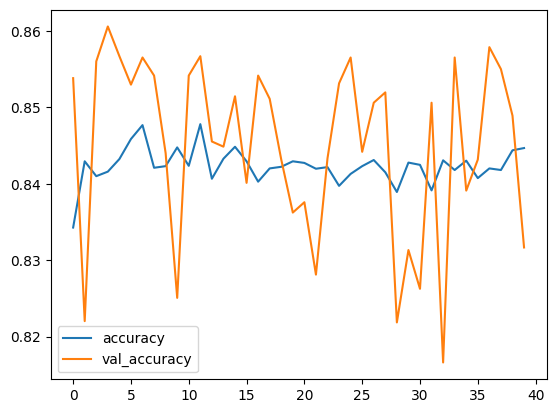

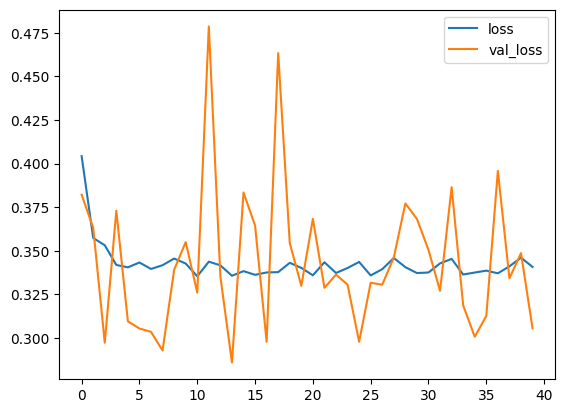

In [115]:
# Plot Training Results
history_seq_tuning_df[['accuracy', 'val_accuracy']].plot()
history_seq_tuning_df[['loss', 'val_loss']].plot()

In [116]:
# # Model Evaluation of test-set
y_pred_seq_tuning = model_seq_tuning.predict(X_test)
y_pred_seq_tuning= np.where(y_pred_seq_tuning >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq_tuning))

231/231 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      3438
           1       0.77      0.98      0.86      3951

    accuracy                           0.83      7389
   macro avg       0.87      0.82      0.83      7389
weighted avg       0.86      0.83      0.83      7389



In [117]:
# Saving report
score_reports = {
    'Test - precision' : precision_score(y_test, y_pred_seq_tuning),
    'Test - recall' : recall_score(y_test, y_pred_seq_tuning),
    'Test - accuracy' : accuracy_score(y_test, y_pred_seq_tuning),
    'Test - f1_score' : f1_score(y_test, y_pred_seq_tuning),
}
all_reports['Sequential API Tuning'] = score_reports
pd.DataFrame(all_reports)

,Sequential API,Functional API,Sequential API Tuning
Test - precision,0.937210,0.937210,0.771503
Test - recall,0.921792,0.921792,0.978486
Test - accuracy,0.925159,0.925159,0.833536
Test - f1_score,0.929437,0.929437,0.862754


## Functional API

In [118]:
# Create Functional Model
input_lyr = tf.keras.layers.Input(shape=(inp,))
layers = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(out, kernel_initializer='HeNormal',activation='sigmoid')(layers)

model_functional_tuning = tf.keras.models.Model(inputs=input_lyr,outputs=output)

# Compile
model_functional_tuning.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(clipvalue=0.5,learning_rate=0.01),metrics='accuracy')
model_functional_tuning.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_17 (Dense)            (None, 25)                650       
                                                                 
 batch_normalization_8 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 90)                2340      
                                                                 
 batch_normalization_9 (Batc  (None, 90)               360       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 90)                0   

In [119]:
# Plot Layers

tf.keras.utils.plot_model(model_functional_tuning, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [120]:
# Train Model
history_func_tuning = model_functional_tuning.fit(X_train,
                                   y_train,
                                   epochs=40,
                                   validation_data=(X_val, y_val),
                                   batch_size=10)

Epoch 1/40
2365/2365 [==============================] - 8s 2ms/step - loss: 0.4546 - accuracy: 0.8257 - val_loss: 0.3579 - val_accuracy: 0.8557
Epoch 2/40
2365/2365 [==============================] - 5s 2ms/step - loss: 0.4086 - accuracy: 0.8368 - val_loss: 0.3591 - val_accuracy: 0.8488
Epoch 3/40
2365/2365 [==============================] - 6s 2ms/step - loss: 0.4066 - accuracy: 0.8358 - val_loss: 0.3523 - val_accuracy: 0.8591
Epoch 4/40
2365/2365 [==============================] - 5s 2ms/step - loss: 0.4027 - accuracy: 0.8375 - val_loss: 0.3743 - val_accuracy: 0.8538
Epoch 5/40
2365/2365 [==============================] - 5s 2ms/step - loss: 0.4050 - accuracy: 0.8380 - val_loss: 0.3546 - val_accuracy: 0.8557
Epoch 6/40
2365/2365 [==============================] - 6s 2ms/step - loss: 0.4046 - accuracy: 0.8405 - val_loss: 0.3497 - val_accuracy: 0.8560
Epoch 7/40
2365/2365 [==============================] - 6s 3ms/step - loss: 0.4009 - accuracy: 0.8391 - val_loss: 0.4081 - val_accuracy:

In [121]:
# Model evaluation
history_func_tuning_df = pd.DataFrame(history_func_tuning.history)
history_func_tuning_df

,loss,accuracy,val_loss,val_accuracy
0,0.454610,0.825692,0.357949,0.855693
1,0.408648,0.836816,0.359091,0.848757
2,0.406639,0.835843,0.352283,0.859076
3,0.402700,0.837493,0.374344,0.853832
4,0.405048,0.837958,0.354613,0.855693
5,0.404624,0.840538,0.349725,0.856031
6,0.400935,0.839058,0.408077,0.840974
7,0.398782,0.842145,0.351878,0.857215
8,0.398927,0.841003,0.363430,0.851294
9,0.398577,0.839438,0.342087,0.856031


<Axes: >

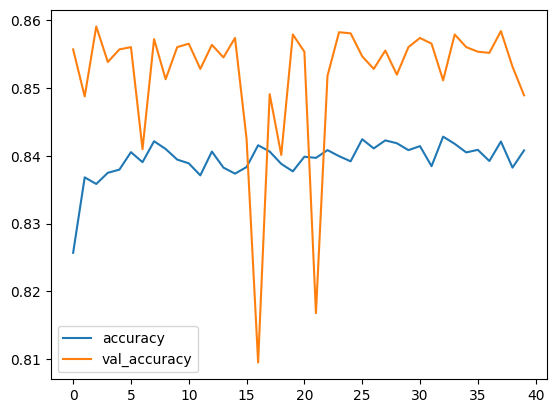

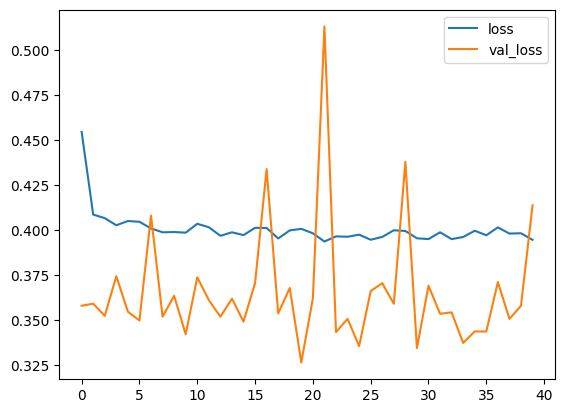

In [122]:
# Plot Training Results
history_func_tuning_df[['accuracy', 'val_accuracy']].plot()
history_func_tuning_df[['loss', 'val_loss']].plot()

In [123]:
# Model Evaluation of test-set
y_pred_func_tuning = model_functional_tuning.predict(X_test)
y_pred_func_tuning= np.where(y_pred_func_tuning >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_tuning))

231/231 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      3438
           1       0.87      0.84      0.86      3951

    accuracy                           0.85      7389
   macro avg       0.85      0.85      0.85      7389
weighted avg       0.85      0.85      0.85      7389



In [124]:
# Saving report
score_reports = {
    'Test - precision' : precision_score(y_test, y_pred_func_tuning),
    'Test - recall' : recall_score(y_test, y_pred_func_tuning),
    'Test - accuracy' : accuracy_score(y_test, y_pred_func_tuning),
    'Test - f1_score' : f1_score(y_test, y_pred_func_tuning),
}
all_reports['Functional API Tuning'] = score_reports
pd.DataFrame(all_reports)

,Sequential API,Functional API,Sequential API Tuning,Functional API Tuning
Test - precision,0.937210,0.937210,0.771503,0.870858
Test - recall,0.921792,0.921792,0.978486,0.844849
Test - accuracy,0.925159,0.925159,0.833536,0.850047
Test - f1_score,0.929437,0.929437,0.862754,0.857657


# ix. Model Saving

In [125]:
# Save pipeline preproses
with open('preproses.pkl', 'wb') as file_1:
  pickle.dump(preproses, file_1)

# save model

In [126]:
# Freeze Model
model_functional.trainable = False

In [127]:
# Save ANN Model

model_functional.save('model.h5')

# x. Model Inference

In [128]:
# Model inference in inference notebook

# xii. Conclusion 

## Model Analisis

Hasil akhir model setelah di hyperparameter malah semakin jelek, perlu penanganan gradient problem, baik exploding gradient maupun vanishing gradient dengan mengatur gradient clipping, weight regularization, menggunakan fungsi aktivasi yang lebih tepat, menggunakan weight initializer yang lebih tepat, dan juga menggunkan batch normalization

## Overall Analisis

Dari hasil EDA di dapat insigh yang menunjukkan beberepa karakter pelanggan yang churn
- Pelanggan yang churn cenderung memiliki average transaksi yang lebih kecil, sekitar 60000 kebawah
- Pelanggan yang churn cenderung memiliki pnt wallet yang lebih kecil 
- Pelanggan yang chrun cenderung pelanggan yang menggunakan special discount, ini kemungkinan karena pelanggan tersebut hanya mengincar discount saja, setelah discountnya habis mereka tidak melanjutkan lagi 

Saran Bisnis
- Untuk pelanggan yang memiliki average transaksi kecil, bisa dikasih promo yang menarik agar tertarik melakukan transaksi  